In [ ]:
import os 
!pip install -U -q segmentation-models --user
os.kill(os.getpid(), 9)

In [1]:
import os 
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

2021-11-08 22:43:25.328096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 22:43:25.328170: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Segmentation Models: using `tf.keras` framework.


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [3]:
stars = pd.read_csv("stars.csv")
dwarfs = stars[(stars["Star type"]==1) | (stars["Star type"]==2) ]
dwarfs.head()

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
10,3600,0.0029,0.5100,10.690,1,Red,M
11,3129,0.0122,0.3761,11.790,1,Red,M
12,3134,0.0004,0.1960,13.210,1,Red,M
13,3628,0.0055,0.3930,10.480,1,Red,M
14,2650,0.0006,0.1400,11.782,1,Red,M


In [4]:
X = dwarfs[["Temperature(K)","Radius(R/Ro)"]].values
y = dwarfs[["Star type"]].values
yl = LabelEncoder().fit_transform(y.flatten())
print(yl)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1]


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2, random_state=42)
# y_test
X_train

array([[1.3340e+04, 1.1600e-02],
       [3.2570e+03, 4.6000e-01],
       [8.9240e+03, 8.7900e-03],
       [3.0950e+03, 4.9200e-01],
       [3.4410e+03, 3.5100e-01],
       [3.5230e+03, 3.1900e-01],
       [3.3400e+03, 2.4000e-01],
       [3.5980e+03, 5.6000e-01],
       [1.4100e+04, 8.9000e-03],
       [2.9940e+03, 2.8000e-01],
       [3.1000e+03, 3.1000e-01],
       [1.1900e+04, 8.9800e-03],
       [8.5700e+03, 9.7000e-03],
       [1.9860e+04, 1.3100e-02],
       [1.2912e+04, 9.4500e-03],
       [1.9360e+04, 9.9800e-03],
       [3.6920e+03, 4.7000e-01],
       [1.3420e+04, 9.8100e-03],
       [1.4520e+04, 9.7200e-03],
       [7.2300e+03, 1.3000e-02],
       [3.1420e+03, 2.5800e-01],
       [3.1800e+03, 3.5000e-01],
       [3.5420e+03, 6.2000e-01],
       [8.5000e+03, 1.0000e-02],
       [2.4020e+04, 1.2700e-02],
       [3.6280e+03, 3.9300e-01],
       [7.7000e+03, 1.2800e-02],
       [1.3720e+04, 8.9200e-03],
       [3.1920e+03, 1.9670e-01],
       [3.5980e+03, 6.7000e-01],
       [2.

(0.0, 25000.0)

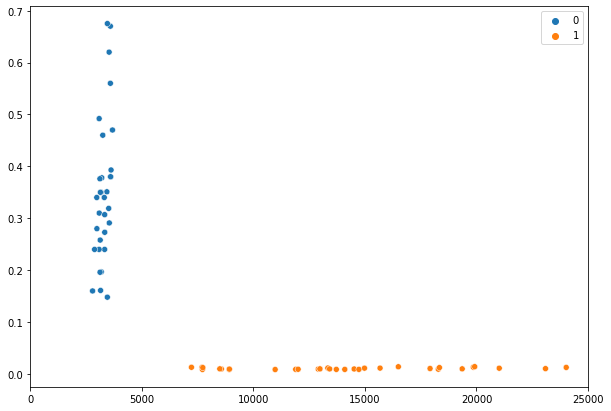

In [6]:
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train)
plt.xlim(0,25000)

In [7]:
# define the model
model = Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
#model.add(Dense(4, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))

2021-11-08 22:43:54.284496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-08 22:43:54.284544: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-08 22:43:54.284568: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ramses-VirtualBox): /proc/driver/nvidia/version does not exist
2021-11-08 22:43:54.285035: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose=0)

In [10]:
loss,acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 240ms/step - loss: 0.1588 - accuracy: 1.0000


(-1.0, 1.0)

/home/ramses/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


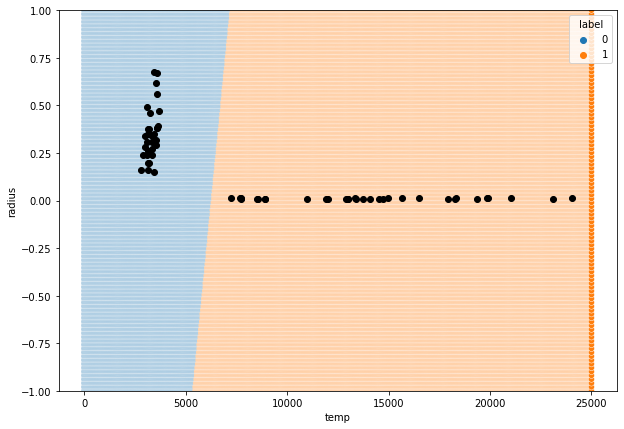

In [11]:
# Plot the decision boundary
temp = np.linspace(0,25000,1000)
radius = np.linspace(-1,1,100)
from itertools import product
randomdata = np.array(list(product(temp,radius)))
g = model.predict(randomdata)
db=pd.DataFrame({"temp":randomdata[:,0],"radius":randomdata[:,1],"label":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="temp",y="radius",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")
#plt.xlim(0,5000)
plt.ylim(-1,1)